# Exercícios

### Para todos os desafios, insira legendas, rótulos dos eixos, título do gráfico.

### Resolva os 3 primeiros exercícios usando matplotlib e os 3 seguintes usando altair. O último, fica à seu critério

## 1) Utilizando o dataset Pokemon, crie uma função que receba o dataset e o atributo e retorne um histograma que mostre a distribuição do valor dos atributos “attack”, “defense”,”Sp.Atk”, “Sp.Def” e “Speed”. Insira uma linha indicando o valor médio do atributo

In [1]:
# resposta 1
import matplotlib.pyplot as plt
import pandas as pd
import sys

df = pd.read_csv("Pokemon.csv", sep = ',')
#df.head()

def histPokemon(data, atributo):
    data.columns = data.columns.str.upper().str.replace('.', '')
    
    if str(atributo) not in (data.columns):
        print("Escolha entre ATTACK, DEFENSE, SP ATK, SP DEF, SPEED")
        sys.exit()
    
    plt.xlabel('Valores')
    plt.ylabel('Probabildade')
    plt.title('Histograma do atributo ' + atributo)
    plt.grid(True)
    plt.hist(x = data[atributo], density=True, facecolor='g', alpha=0.75)

#plt.hist(x = df['Attack'])
histPokemon(df,input("Selecione entre os atributos ATTACK, DEFENSE, SP ATK, SP DEF, SPEED: "))
    

Selecione entre os atributos ATTACK, DEFENSE, SP ATK, SP DEF, SPEED:  ATTACK


## 2) Usando o dataset Pokemon, crie um scatter plot comparando ataque (eixo x) e defesa (eixo y) de pokemons dos tipos Fire e Water. 

Text(0.5, 1.0, 'Ataque vs Defesa (Pokemons do Tipo Fire e Water)')

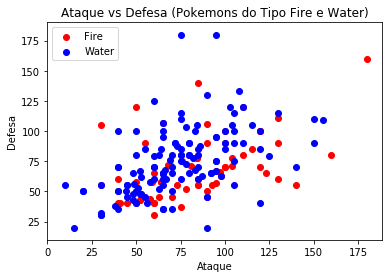

In [2]:
# resposta 2
# no mesmo scatter plot
#df2 = df[(df['TYPE 1'] == ('Fire')) | (df['TYPE 1'] == ('Water')) | (df['TYPE 2'] == ('Fire')) | (df['TYPE 1'] == ('Water'))]
df3 = df[(df['TYPE 1'] == ('Fire')) | (df['TYPE 2'] == ('Fire'))]
df4 = df[(df['TYPE 1'] == ('Water')) | (df['TYPE 2'] == ('Water'))]

#plt.scatter(df2['ATTACK'], df2['DEFENSE'])
plt.scatter(df3['ATTACK'], df3['DEFENSE'], color='r', label='Fire')
plt.scatter(df4['ATTACK'], df4['DEFENSE'], color='b', label='Water')
plt.xlabel('Ataque')
plt.ylabel('Defesa')
plt.legend(loc='best')
plt.title('Ataque vs Defesa (Pokemons do Tipo Fire e Water)')

#df2

## 3) Usando o dataset Pokemons, crie um gráfico de linha para comparar a quantidade de pokemons de cada tipo ao longo das gerações

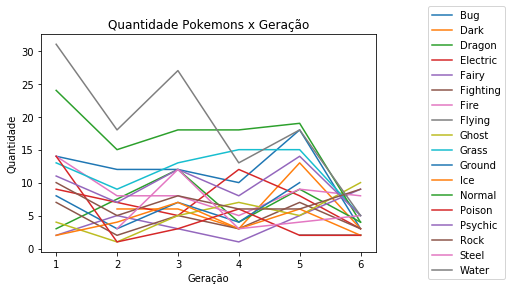

In [3]:
# resposta 3
df5 = df.groupby(['TYPE 1', 'GENERATION']).size()

df5 = df5.to_frame().reset_index()
df6 = df5['TYPE 1'].drop_duplicates()
df6 = df6.to_frame()

for i in df6['TYPE 1']:
    #plt.plot(df5['GENERATION'], df5[0], label= str(i))
    plt.plot(df5[df5['TYPE 1'] == str(i)]['GENERATION'], df5[df5['TYPE 1'] == str(i)][0], label= str(i))
    #plt.plot(df5[df5['TYPE 1'] == str(i)][0], df5[df5['TYPE 1'] == str(i)]['GENERATION'], label= str(i))
    
plt.xlabel('Geração')
plt.ylabel('Quantidade')
plt.title("Quantidade Pokemons x Geração")

plt.legend(loc='lower right', bbox_to_anchor=(1.4, - 0.15))

## 4) Utilizando o dataset airports (var = data.airports()):
    -> Faça um rank bar dos 5 primeiros estados dos EUA com maior número de aeroportos


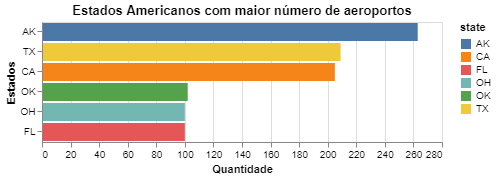

In [4]:
# resposta 4
# a partir desse exercício usar o altair
import pandas as pd
import altair as alt
from vega_datasets import data

var = data.airports()

alt.Chart(var).transform_aggregate(
    count='count()',
    groupby=['state']
).transform_window(
    rank='rank(count)',
    sort=[alt.SortField('count', order='descending')]
).transform_filter(
    alt.datum.rank <= 5
).mark_bar().encode(
    y=alt.Y('state:N',#:N - variável nominal
        sort=alt.EncodingSortField(field='count', op='sum', order='descending'),
        title='Estados'
    ),
    x=alt.X('count:Q',title='Quantidade'),#:Q - variáveis quantitativas
    color=alt.Color('state')
).properties(
    title='Estados Americanos com maior número de aeroportos',
)

## 5) Utilizando o conjunto de dados íris (var = data.íris()):
    -> Crie dois gráficos scatter, chart1 e chart2. Para o chart1, x=petalLenght, y=petalWidth. Para o chart2, x = sepalLenght, y=sepalWidth.

    -> Componha esses gráficos numa única apresentação. Para isso, faça chart1 | chart2


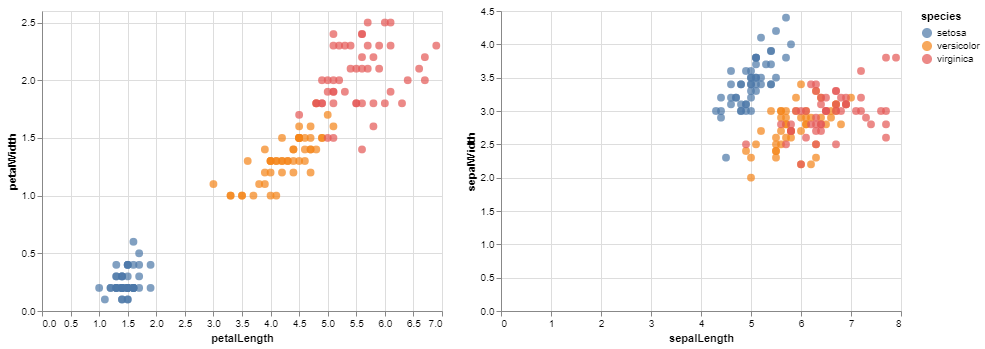

In [5]:
# resposta 5
import pandas as pd
import altair as alt
from vega_datasets import data

var = data.iris()
#print(var.head())

alt1 = alt.Chart(var).mark_circle(size=60).encode(
    x='petalLength',
    y='petalWidth',
    color='species',
    tooltip=['species' ,'petalLength', 'petalWidth', 'sepalLength', 'sepalWidth']
).interactive()

alt2 = alt.Chart(var).mark_circle(size=60).encode(
    x='sepalLength',
    y='sepalWidth',
    color='species',
    tooltip=['species' ,'petalLength', 'petalWidth', 'sepalLength', 'sepalWidth']
).interactive()

alt1 | alt2

## 6) Usando o dataset Pokemon, crie um rank bar que mostre o rank para Type 1

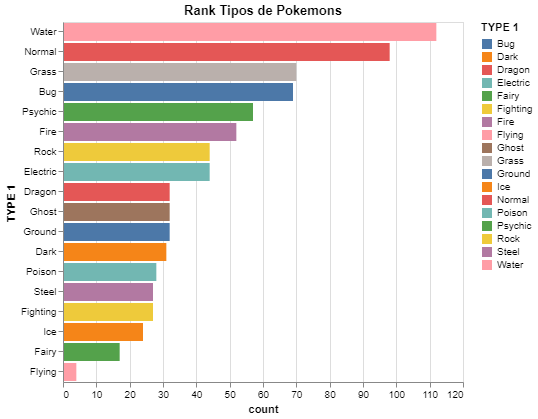

In [6]:
# resposta 6
alt.Chart(df).transform_aggregate(
    count = 'count()',
    groupby = ['TYPE 1']
).transform_window(
    rank='rank(count)',
    sort=[alt.SortField('count', order='descending')]
).transform_filter(
    alt.datum.rank
).mark_bar().encode(
    y=alt.Y('TYPE 1:N', # N de Variavel Nominal
        sort=alt.EncodingSortField(field='count', op='sum', order='descending')
    ),
    x='count:Q', # Q de Variavel Quantitativa
    color=alt.Color('TYPE 1')
).properties(
    title='Rank Tipos de Pokemons'
)

## 7) Utilizando o dataset Pokemon, crie um gráfico de barras que mostre, para cada geração, a proporção de pokemons Legendários e aqueles que não são legendários. Use stacked bar. 

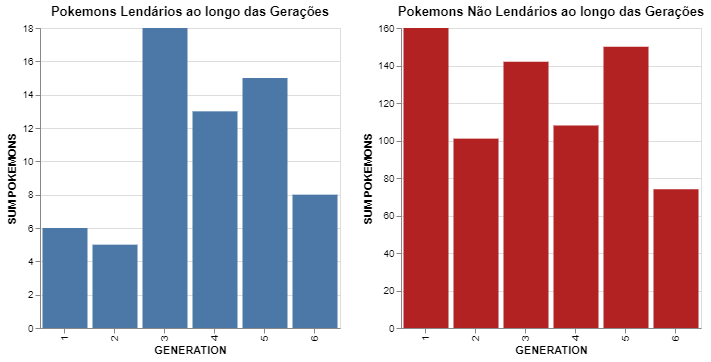

In [30]:
# resposta 7
x = df[df['LEGENDARY'] == True]
x = x.groupby(['GENERATION', 'LEGENDARY']).size().to_frame().reset_index()
x.columns = ['GENERATION', 'LEGENDARY', 'SUM POKEMONS']

y = df[df['LEGENDARY'] == False]
y = y.groupby(['GENERATION', 'LEGENDARY']).size().to_frame().reset_index()
y.columns = ['GENERATION', 'LEGENDARY', 'SUM POKEMONS']

#print(x)
#print(x1)
#print(y)
#print(df.head())

alt1 = alt.Chart(x).mark_bar().encode(
    y='SUM POKEMONS',
    x='GENERATION:O'
    #color=alt.Color('TYPE 1')
).properties(
    title='Pokemons Lendários ao longo das Gerações',
    width=300
)

alt2 = alt.Chart(y).mark_bar(color='firebrick').encode(
    y='SUM POKEMONS',
    x='GENERATION:O'
    #color=alt.Color('TYPE 1')
).properties(
    title='Pokemons Não Lendários ao longo das Gerações',
    width=300
)

alt1 | alt2